# Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score






# Simple Linear Regression

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## Create new independet variable, feature enginnering

In [4]:
# total_spend = toplam reklam harcamasi 

df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


## Changing the order of features

In [5]:
df = df.iloc[:,[0,1,2,4,3]] # feature siralamasini degistiriyoruz.
df

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


## Correlation
Which feature is more suitable for linear regression?

In [6]:
# The correlation of sales feature with the others

for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616066
corr between sales and radio       : 0.5762225745710552
corr between sales and newspaper   : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017418


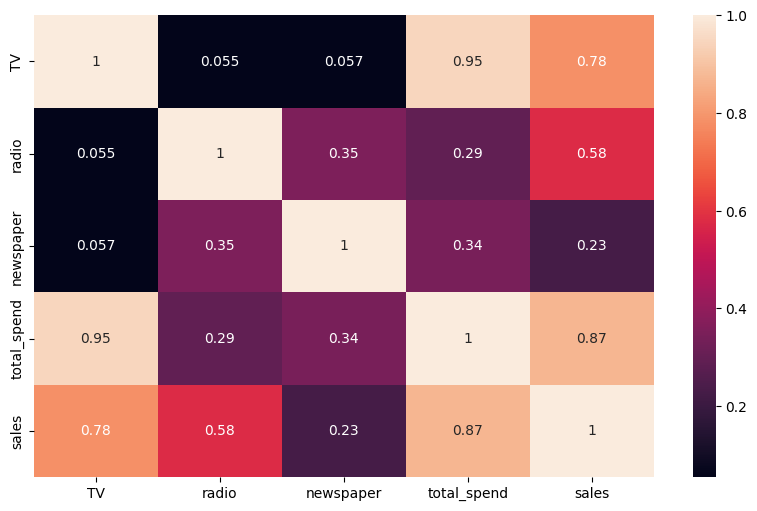

In [7]:
sns.heatmap(df.corr(), annot=True);

In [8]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


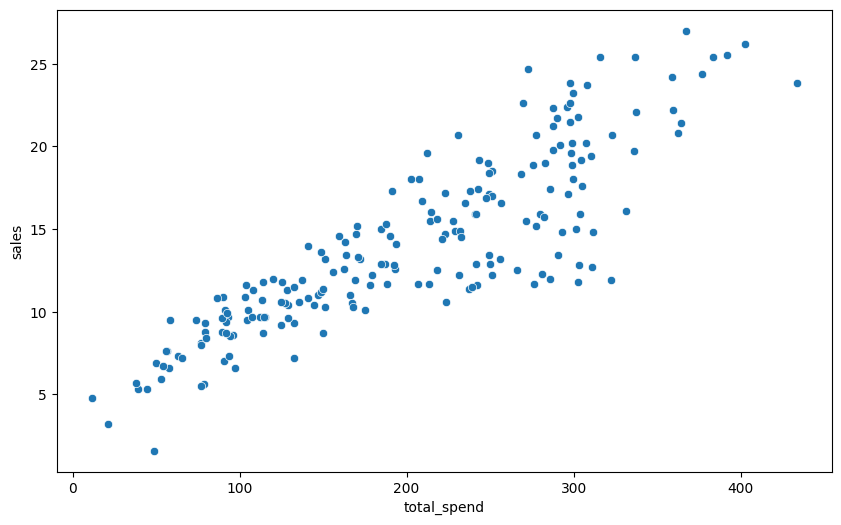

In [9]:
sns.scatterplot(x="total_spend", y="sales", data=df);

In [10]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017418

In [11]:
df["total_spend"].corr(df["sales"])

0.8677123027017419

## Coefficant of determination (R **2)

In [12]:
R2_score = corr**2
R2_score

""" R² = bagımlı degişkendeki toplam varyansın yuzde kaçının bagımsız 
degişken tarafından açıklanadıgını söyler

total spend, sales'in %75'ini aciklamaktadir
"""

" R² = bagımlı degişkendeki toplam varyansın yuzde kaçının bagımsız \ndegişken tarafından açıklanadıgını söyler\n\ntotal spend, sales'in %75'ini aciklamaktadir\n"

## Linear Regression

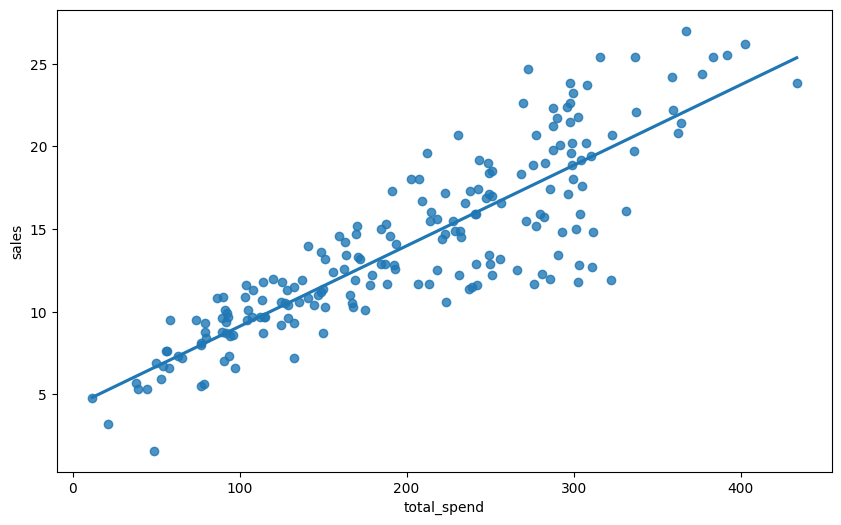

In [13]:
# Least square Error LSE ile line of best fit secimi

sns.regplot(x="total_spend", y="sales", data=df, ci=None);

## Spliting the dataset into X (independent variables) and y (dependent variables)

In [14]:
X = df["total_spend"] # feature
y = df["sales"]  # target

In [15]:
# icine ind. ve dep. variable verdigimde ve derecesini belirttimde danklemin katsayilarini vercek
# sadece simple linear reg icin

np.polyfit(X, y, deg=1)

""" array([0.04868788, 4.24302822])
y = b1 * X + b0
sonucun ilk degeri X in katsayisi yani (b1) - slope 
sonucun ikinci degeri intercept olur - b0
"""

array([0.04868788, 4.24302822])

In [16]:
slope, intercept = np.polyfit(X, y, deg=1)
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.048687879319048145
intercept: 4.2430282160363255


In [17]:
b1, b0 = np.polyfit(X, y, deg = 1)
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [18]:
# y_pred i formulize edelim.. y_pred = b1*x + b0

y_pred = b1*X + b0
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [19]:
values = {"actual": y, "predicted":y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [27]:
# Predictions for potential_spend

potential_spend = np.linspace(0, 500, 100)

predicted_sales_lin = b1*potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

## To improve our predictions

overfitting x den x2, x3, x**4 yapmak complexity yi artirir ancak variance artar yani tahmin zorlasir

y = b1*x + bß -> simple linear

y = a1 * x3 + a2 * x2 + a3 * x + a0 -> 3 degree polinominal polynominal olarak tahmini iyileştirebiliriz.

In [20]:
a = np.polyfit(X,y, deg=3)
a
"""
# array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])
# fonksiyonun döndürdugu sonuclar polinom katsayilarini verir. eger cikti [a,b,c,d] 
seklindeyse, bu, bulunan en iyi uyan polinomun y = ax^3 + bx^2 + cx + d 
"""

'\n# array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])\n# fonksiyonun döndürdugu sonuclar polinom katsayilarini verir. eger cikti [a,b,c,d] \nseklindeyse, bu, bulunan en iyi uyan polinomun y = ax^3 + bx^2 + cx + d \n'

In [21]:
a1 = np.polyfit(X, y, deg=3)[0]
a2 = np.polyfit(X, y, deg=3)[1]
a3 = np.polyfit(X, y, deg=3)[2]
a0 = np.polyfit(X, y, deg=3)[3]

In [23]:
#polynom fonksiyon için tahminleri almış oldum

predicted_sales_poly = a1 * potential_spend**3 + a2 * potential_spend**2 + a3 * potential_spend + a0
predicted_sales_poly

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

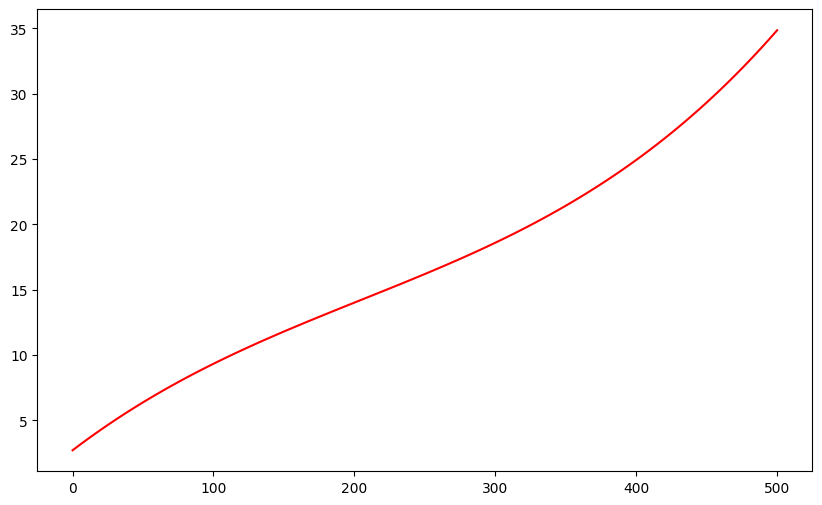

In [24]:
plt.plot(potential_spend, predicted_sales_poly, color="r");

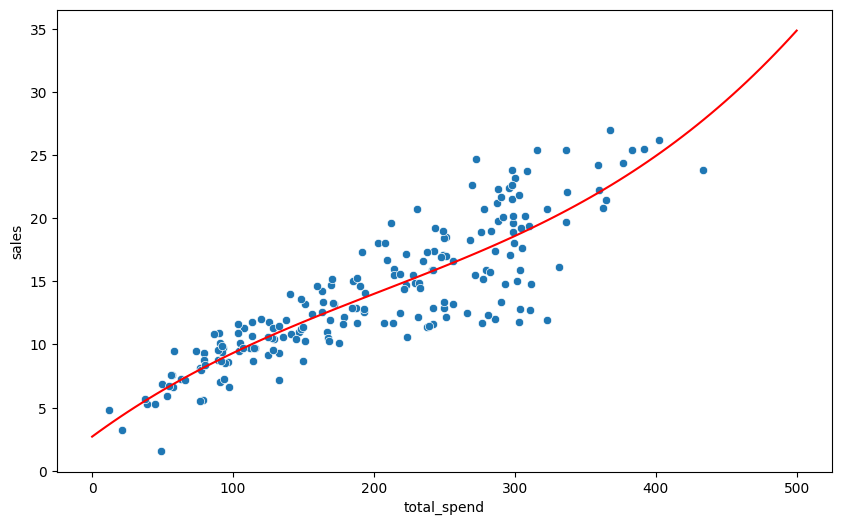

In [25]:
plt.plot(potential_spend, predicted_sales_poly, color="r")
sns.scatterplot(x="total_spend", y="sales", data=df);

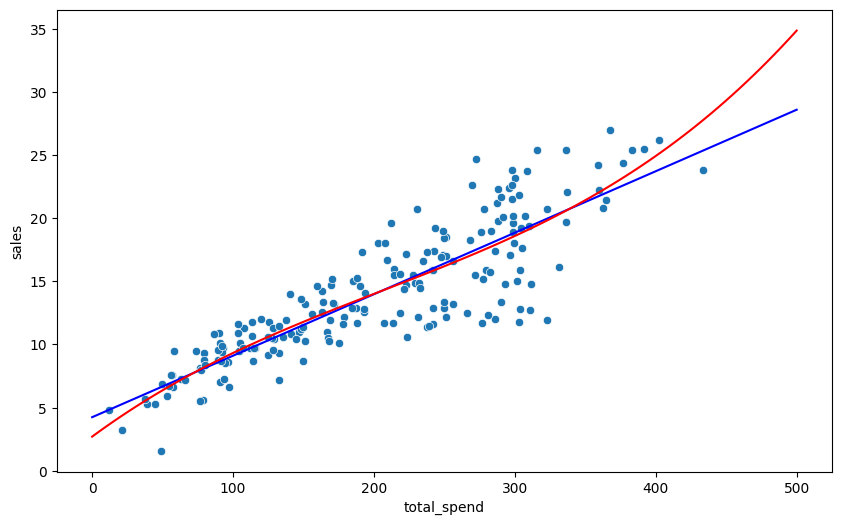

In [28]:
plt.plot(potential_spend, predicted_sales_lin, color = "blue")
plt.plot(potential_spend, predicted_sales_poly, color = "red")
sns.scatterplot(x ="total_spend", y = "sales", data = df);

# Multiple Linear Regression and Regression Error Metrics
y = ax1 + bx2 + cx3 + ... feature sayisinca

y = b0 + b1X1 + b2X2 + b3X3 multiple linear regression kullanacagiz

In [29]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Train-Test Split

In [30]:
X = df.drop(columns = "sales")  # X = df[["TV", "radio", "newspaper"]] alternativ kullanim
y = df["sales"]     # X ler feature olarak, y target olarak label landi

print(X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# train ve test setlerinin shape lerine bakiyoruz

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


## Model Fitting and Compare Actual and Predicted Labels

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)  

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [38]:
model.coef_   # y = ax1 + bx2 + cx3 + b0      esitligindeki a,b, c

array([0.04405928, 0.1992875 , 0.00688245])

In [39]:
model.feature_names_in_ # yukardaki katsayilarin karsilik geldigi feature lar

array(['TV', 'radio', 'newspaper'], dtype=object)

In [40]:
model.intercept_  # bu da b0

2.7089490925159065

In [41]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


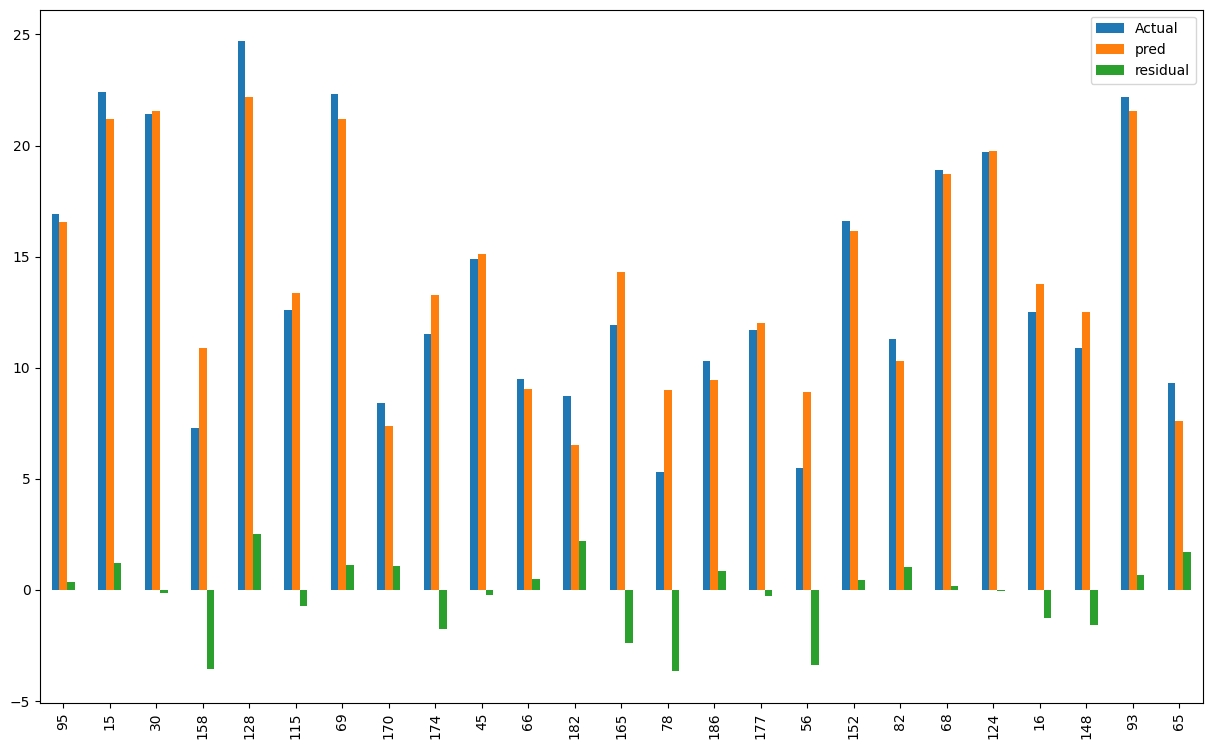

In [43]:
comparing.head(25).plot(kind="bar", figsize = (15,9))
plt.show()

## Evaluation Model

In [51]:
# Error metricleri hesaplayan ve döndüren kod

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [52]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549086
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [54]:
# Overfitting kontrolü icin train data daki R" yi bulalim ve yukaridaki test R2 (0.86) ile karsilastiralim
# X_train degerlerini prediction yapacagiz

y_train_pred = model.predict(X_train)

eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072526
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Plotting Residuals

In [55]:
residuals = y_test - y_pred

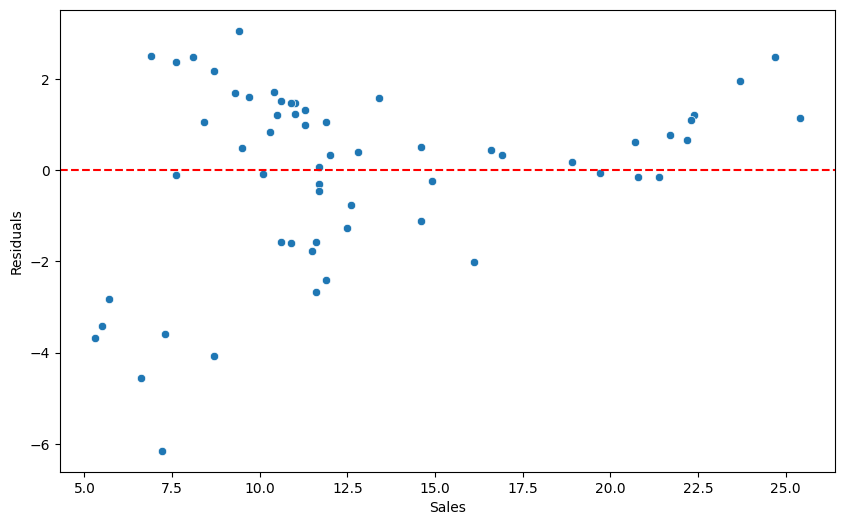

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color="r", linestyle = "--")
plt.xlabel('Sales')
plt.ylabel('Residuals')
plt.show()

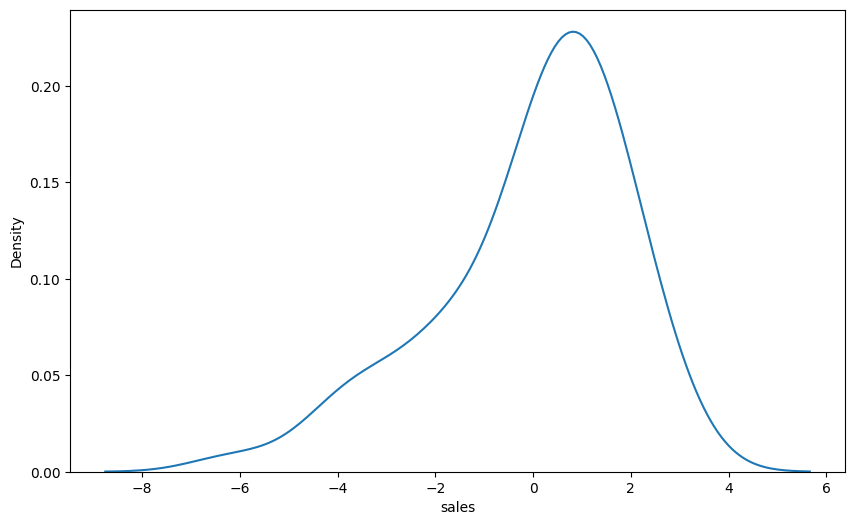

In [57]:
# KDE de cizilebilir
sns.kdeplot(residuals);

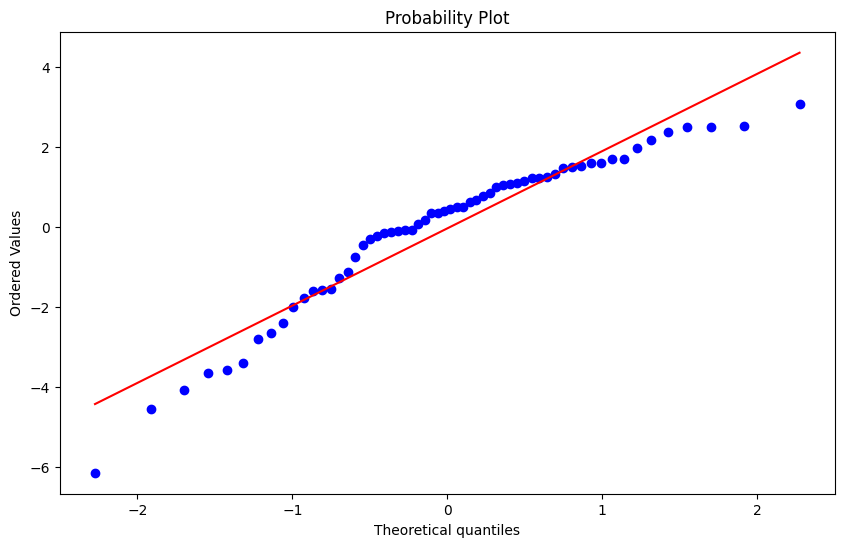

In [60]:
stats.probplot(residuals, dist= "norm", plot = plt);

# alttaki grafik Q-Q grafigi olarak bilinir. noktalarin dogru üzerinde gitmesi residual larin normal dagildigini söyler
# bu grafik ile residullarin normal dagilip dagilmadigini gösterir

In [61]:
skew(residuals)  # Skewness icin -1 ve +1 arasi normal kabul edilebilir

NameError: name 'skew' is not defined

## Yellowbrick - Visualization

In [62]:
#pip install yellowbrick

from yellowbrick.regressor import ResidualsPlot 

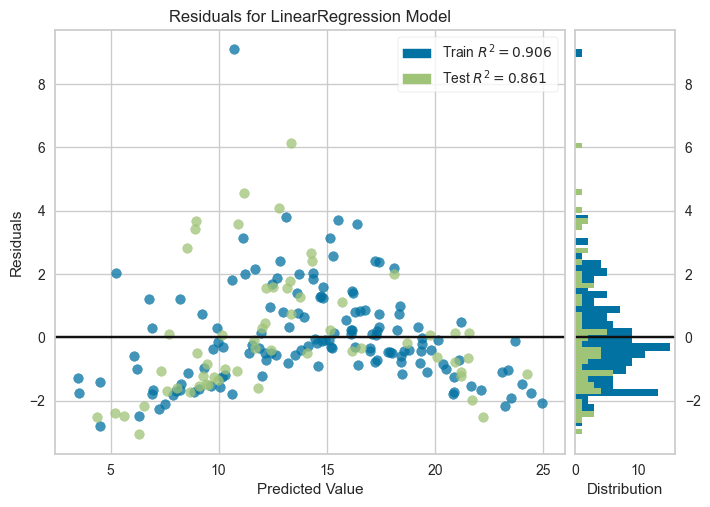

In [63]:
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [64]:
# Prediction Error for Linear Regression

from yellowbrick.regressor import PredictionError

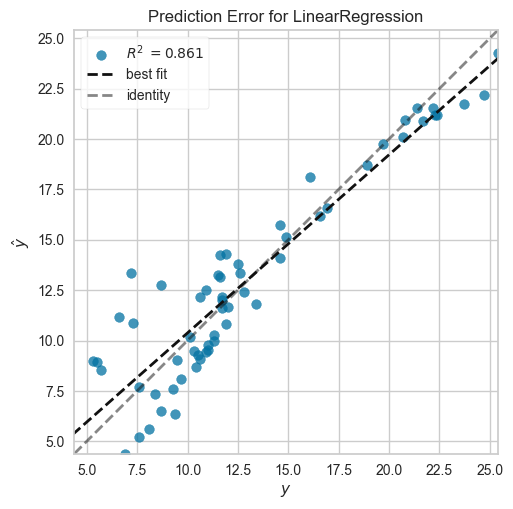

In [65]:
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# iki grafik cizgisi birbiri uzerinde ise model o kadar iyi ve noktalar kümelenmemeli

## Final Model - Retraining Model on Full Data

In [66]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [67]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [68]:
final_model.intercept_

2.938889369459412

## Prediction on New Data

In [69]:
adv = [[150, 20, 15]]
adv

final_model.predict(adv)  

array([13.55862413])

In [70]:
# saglamasi

sum(final_model.coef_*[150, 20, 15]) + final_model.intercept_

13.558624130495996

In [71]:
adv_2 = [[120,20,15], [150,20,20], [100,35,25]]
final_model.predict(adv_2)

array([12.18568477, 13.55343667, 14.08796718])